In [1]:
"""
Var 13
Нехай x(t) - чисельність жертв, y(t) - чисельність хижаків. Коефіцієнт розмноження жертв за відсутності
хижаків дорівнює 9, а коефіцієнт природньої загибелі хижаків 6. При взаємодії двох популяцій, жертви
зменшуються з інтенсивністю 4, при цьому хижаки нарощують свою біомасу з інтенсивністю 9.
Досідити:
    1) Стаціонарні точки.
    2) Побудувати графік динаміки двох популяцій (а) x0 > y0, (б)  x0 < y0.
    3) Побудувати 3D графік.
Коефіцієнт внутрішньовидової взаємодії серед жертв дорівнює 3.
Провести аналогічне дослідження (пункти 1)-3)).
""";

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
import seaborn as sns

sns.set()
%matplotlib inline
params = {'legend.fontsize': 16,
          'legend.handlelength': 2}
plt.rcParams.update(params)

In [3]:
h = 0.01
t = np.arange(0, 3 + h, h)

eps1, gamma1 = 9, 4
eps2, gamma2 = 6, 9

dxdt = lambda x, y: x * ( eps1 - gamma1 * y)
dydt = lambda x, y: y * (-eps2 + gamma2 * x)
grad = lambda z, t=0: (dxdt(*z), dydt(*z))
jacobian = lambda x, y: np.array([[eps1 - gamma1 * y,  -gamma1 * x       ],
                                  [gamma2 * y,         -eps2 + gamma2 * x] ])
x_s1 = 0
y_s1 = 0

x_s2 = eps2 / gamma2
y_s2 = eps1 / gamma1

print(f"stationary point {np.round(x_s1, 2), np.round(y_s1, 2)}")
print(f"stationary point {np.round(x_s2, 2), np.round(y_s2, 2)}")

stationary point (0, 0)
stationary point (0.67, 2.25)


In [4]:
j_s1 = jacobian(x_s1, y_s1)
j_s2 = jacobian(x_s2, y_s2)
lambda_s1, v_s1 = np.linalg.eig(j_s1) 
lambda_s2, v_s2 = np.linalg.eig(j_s2) 
print(lambda_s1)  # сідло
print(v_s1)
print(lambda_s2)  # центр
print(v_s2) 

[ 9. -6.]
[[1. 0.]
 [0. 1.]]
[0.+7.34846923j 0.-7.34846923j]
[[0.        +0.34112115j 0.        -0.34112115j]
 [0.94001934+0.j         0.94001934-0.j        ]]


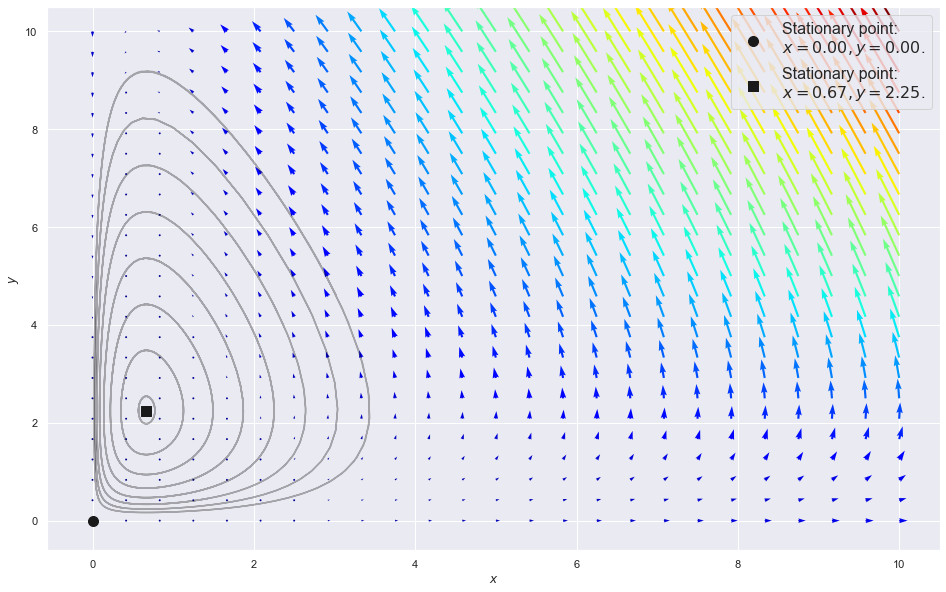

In [6]:
fig, ax = plt.subplots(figsize=(16, 10))

values  = np.linspace(0.1, 3, 10)                        
for v in values:
    X0 = v + np.array([x_s2, y_s2]) 
    X = odeint(grad, X0, t)
    if np.abs(X).max() < 10:
        ax.plot(X[:,0],
                X[:,1], 
                color='0',
                alpha=0.3)

        
nb_points = 25
x = np.linspace(0, 10, nb_points)
y = np.linspace(0, 10, nb_points)

X1 , Y1  = np.meshgrid(x, y)                
DX1, DY1 = grad([X1, Y1])                     
M = np.hypot(DX1, DY1)                         
ax.quiver(X1, Y1, DX1, DY1, M, cmap=plt.cm.jet, angles='xy')


ax.scatter(x_s1,
           y_s1,
           s=100,
           c='k',
           marker='o',
           label=f'Stationary point:\n$x = {x_s1:.2f}, y = {y_s1:.2f}$.')
ax.scatter(x_s2,
           y_s2, s=100,
           c='k',
           marker='s',
           label=f'Stationary point:\n$x = {x_s2:.2f}, y = {y_s2:.2f}$.')
     
    
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend();